# Taller: Análisis de Instagram con Apify API + Gemini  

Fecha de generación: 2025-05-21


**Objetivos**

1. Obtener datos públicos de Instagram usando el actor **`apify/instagram-api-scraper`**.  
2. Limpiar y pre‑procesar captions e información de posts (descriptiva de los captions).  
3. Clasificar sentimiento de captions con la API de Google Generative AI (Gemini).  
4. Extraer temas dominantes con LDA y nombrarlos con Gemini. Crear Prompt
6. Diseñar una micro‑campaña basada en los insights descubiertos.


In [ ]:
import pandas as pd
import requests
import google.generativeai as palm

In [ ]:
# 🔑 Introduce tu token de Apify y de Google Generative AI (Gemini)
import os

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv

--2025-05-31 02:40:44--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv [following]
--2025-05-31 02:40:45--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/TercerCorte/instagram_posts.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18361753 (18M) [text/plain]
Saving to: ‘instagram_posts.csv’

instagram_posts.csv 100%[===================>]  17.51M 

In [ ]:
import pandas as pd

df = pd.read_csv("instagram_posts.csv")


In [ ]:
df

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.instagram.com/f1/,3625722627893565139,f1,https://www.instagram.com/p/DJRJ4UpsRbT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1,Original audio,True,False,NaN,3.839541e+14,NaN,NaN,NaN,NaN
196,https://www.instagram.com/f1/,3625703207133564981,f1,https://www.instagram.com/p/DJRFdtqMNA1/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,https://www.instagram.com/f1/,3625748371707002405,f1,https://www.instagram.com/p/DJRPu8ci_4l/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,lego,Original audio,True,False,NaN,1.034717e+15,NaN,NaN,NaN,NaN
198,https://www.instagram.com/f1/,3625749585934254899,f1,https://www.instagram.com/p/DJRQAnSIYMz/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### 🔍 Preguntas – Sección 1 (Exploración)
Mire las columnas de su dataset y responda
1. ¿Cuántos posts hay en total?  
2. ¿Qué tipos de contenido (imagen, vídeo, carrusel) predominan?  (mira la columna type)
3. ¿Cuál es el rango de fechas cubierto por los posts?  
4. ¿Qué post obtuvo más 'likes' y cuál crees que es la razón?


In [ ]:
print(f"Hay {df.shape[0]} posts en total.")

Hay 200 posts en total.


In [ ]:
print("Predominancia de tipos de contenido:")
print(df['type'].value_counts())

Predominancia de tipos de contenido:
type
Video      86
Sidecar    83
Image      31
Name: count, dtype: int64


In [ ]:
import pandas as pd
df['timestamp'] = pd.to_datetime(df['timestamp'])
min_date = df['timestamp'].min()
max_date = df['timestamp'].max()
print(f"El rango de fechas cubierto por los posts es desde {min_date.date()} hasta {max_date.date()}.")

El rango de fechas cubierto por los posts es desde 2025-05-05 hasta 2025-05-21.



## 🧹 Sección 2 (Limpieza)

Explica por qué es importante limpiar y normalizar el texto de los captions.  
Entregue un grafico de barras con las frecuencia en los captions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<ipython-input-33-3c7ee59cc94a>:7: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-3c7ee59cc94a>:7: UserWarning: Glyph 127950 (\N{RACING CAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-3c7ee59cc94a>:7: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-3c7ee59cc94a>:7: UserWarning: Glyph 129321 (\N{GRINNING FACE WITH STAR EYES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-3c7ee59cc94a>:7: UserWarning: Glyph 128171 (\N{DIZZY SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-3c7ee59cc94a>:7: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-3c7ee59cc94a>:7: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<i

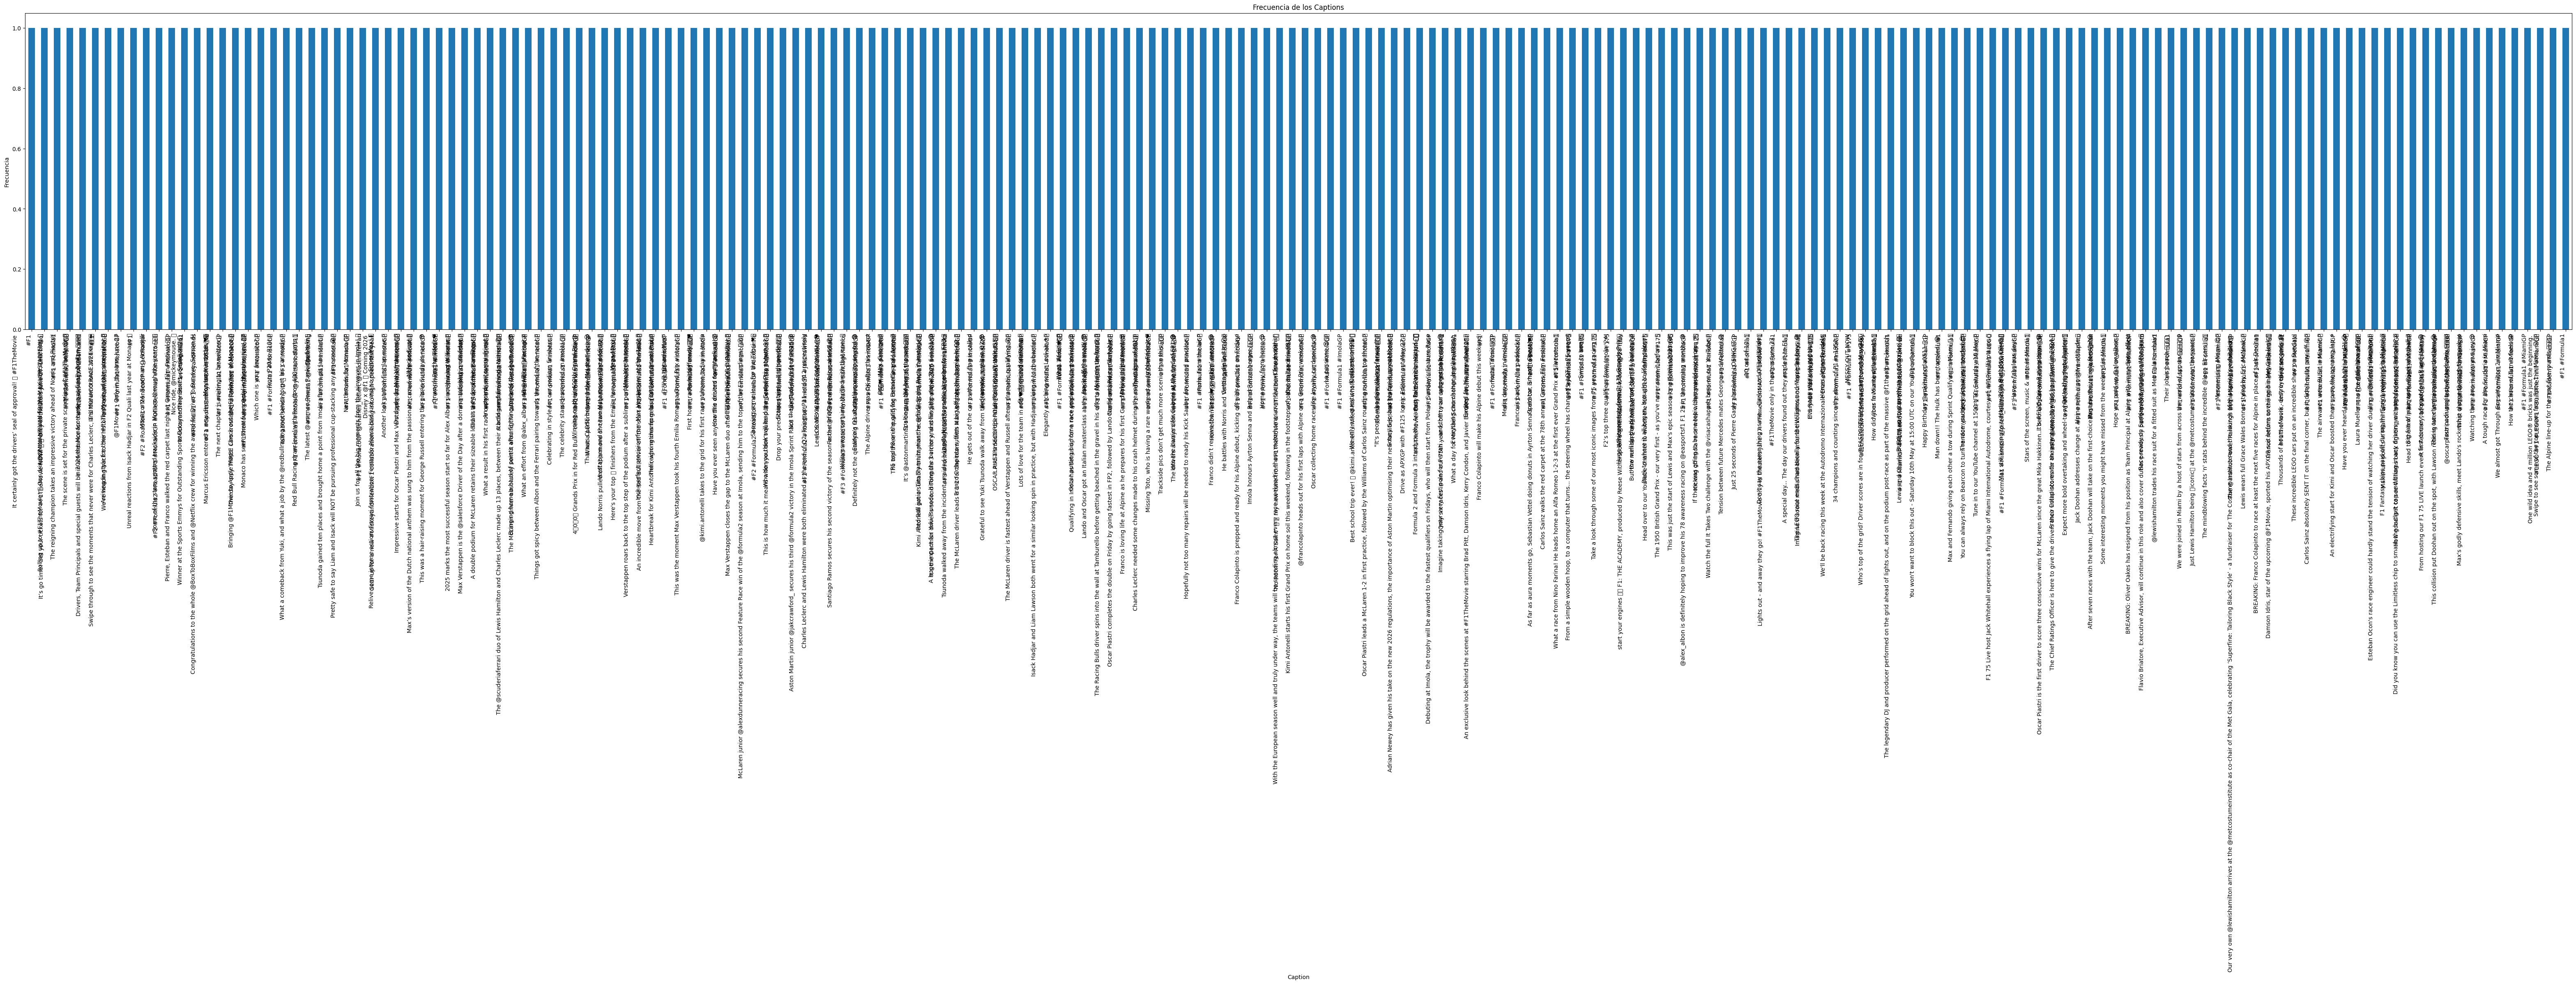

In [ ]:
plt.figure(figsize=(80, 10))
caption_counts.plot(kind='bar')
plt.title('Frecuencia de los Captions')
plt.xlabel('Caption')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

'hoy clase virtual paro nacional'

'En cada imagen se esconde un Mickey, ¿puedes encontrarlos todos? 🔍\n\nNo te pierdas estos títulos y más en @DisneyPlusLA.'


## 🗂 Sección 3 (Temas)
5. Pida a chatgpt o a una IA que le de 3 temas para clasificar un caption y denle un ejemplo.
6. Escriba un prompt en donde le pida clasificar un caption y que de respuesta solo regrese una palabra.
7. Apliquelo en toda la columna caption creando una columna topics.

10. Lista los nombres de los temas generados. ¿Alguno es inesperado?  
11. Con un heatmap *tipo de contenido × tema*, indica qué tema es “propiedad” de cada formato.  
12. Para el tema dominante, proporciona dos insights accionables.


In [ ]:
df.head()

,inputUrl,id,username,url,fullName,biography,externalUrls,externalUrl,externalUrlShimmed,followersCount,...,musicInfo.artist_name,musicInfo.song_name,musicInfo.uses_original_audio,musicInfo.should_mute_audio,musicInfo.should_mute_audio_reason,musicInfo.audio_id,locationName,locationId,paidPartnership,sponsors
0,https://www.instagram.com/f1/,3637646598679593202,f1,https://www.instagram.com/p/DJ7hE70tIDy/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/f1/,3637494954817152582,f1,https://www.instagram.com/p/DJ6-mOeJuZG/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,f1movie,Original audio,True,False,NaN,1.403914e+15,NaN,NaN,NaN,NaN
2,https://www.instagram.com/f1/,3637535605467005779,f1,https://www.instagram.com/p/DJ7H1xVskNT/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/f1/,3635278159597499148,f1,https://www.instagram.com/p/DJzGjnCi3MM/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/f1/,3637456706674459999,f1,https://www.instagram.com/p/DJ615pHMYVf/,FORMULA 1®,It's All To Drive For!\n \nThis story can only...,"[{'title': 'Overtake of the month vote', 'lynx...",https://f1.com/Overtake,https://l.instagram.com/?u=https%3A%2F%2Ff1.co...,34614194,...,NaN,NaN,NaN,NaN,NaN,NaN,Monaco,16366456.0,NaN,NaN


In [ ]:
import requests
import json

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = ""

In [ ]:
from openai import OpenAI

client = OpenAI()


In [ ]:
def suma(a,b):
 return a+b

In [ ]:
suma(5,10)

15

In [ ]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4.1",
  input=prompt
)
  return response.output_text



In [ ]:
call_llm("hola")

APIConnectionError: Connection error.

In [ ]:
def classify_topics(text):
  prompt = (f"Clasifica por tematicas el siguiente caption:{text} "
              f"solo tienes entre estos temas juegos_desafios, promocion, personajes. solo responde con una palabra")
  respuesta = call_llm(prompt)
  return respuesta



## 📝 Sección 4 (Micro‑campaña)

Cree una columna para una publicidad especifica:


In [ ]:
import pandas as pd

# Lista de diccionarios con la información
datos = [
    {"Nombre": "Ana Torres", "Personaje de Interés": "Estudiante universitaria", "Rango de Edad": "18-24", "Producto a Vender": "Laptop económica"},
    {"Nombre": "Carlos Pérez", "Personaje de Interés": "Emprendedor digital", "Rango de Edad": "25-34", "Producto a Vender": "Software de productividad"},
    {"Nombre": "Lucía Gómez", "Personaje de Interés": "Madre primeriza", "Rango de Edad": "25-34", "Producto a Vender": "Pañales ecológicos"},
    {"Nombre": "Marco Díaz", "Personaje de Interés": "Gamer profesional", "Rango de Edad": "18-24", "Producto a Vender": "Silla ergonómica para gaming"},
    {"Nombre": "Teresa Ríos", "Personaje de Interés": "Ejecutiva de marketing", "Rango de Edad": "35-44", "Producto a Vender": "Cursos de liderazgo online"},
    {"Nombre": "Andrés López", "Personaje de Interés": "Jubilado activo", "Rango de Edad": "65-74", "Producto a Vender": "Viajes culturales guiados"},
    {"Nombre": "Valentina Cruz", "Personaje de Interés": "Influencer de moda", "Rango de Edad": "18-24", "Producto a Vender": "Ropa de diseñador"},
    {"Nombre": "Roberto Silva", "Personaje de Interés": "Dueño de cafetería", "Rango de Edad": "35-44", "Producto a Vender": "Cafetera industrial"},
    {"Nombre": "Elena Fuentes", "Personaje de Interés": "Freelance creativa", "Rango de Edad": "25-34", "Producto a Vender": "Tableta gráfica"},
    {"Nombre": "Javier Ramírez", "Personaje de Interés": "Papá de familia numerosa", "Rango de Edad": "35-44", "Producto a Vender": "Plan de supermercado online"}
]

# Crear el DataFrame
df = pd.DataFrame(datos)

In [ ]:
df

,Nombre,Personaje de Interés,Rango de Edad,Producto a Vender
0,Ana Torres,Estudiante universitaria,18-24,Laptop económica
1,Carlos Pérez,Emprendedor digital,25-34,Software de productividad
2,Lucía Gómez,Madre primeriza,25-34,Pañales ecológicos
3,Marco Díaz,Gamer profesional,18-24,Silla ergonómica para gaming
4,Teresa Ríos,Ejecutiva de marketing,35-44,Cursos de liderazgo online
5,Andrés López,Jubilado activo,65-74,Viajes culturales guiados
6,Valentina Cruz,Influencer de moda,18-24,Ropa de diseñador
7,Roberto Silva,Dueño de cafetería,35-44,Cafetera industrial
8,Elena Fuentes,Freelance creativa,25-34,Tableta gráfica
9,Javier Ramírez,Papá de familia numerosa,35-44,Plan de supermercado online


In [ ]:
def generar_caption(nombre, topic, personaje, publico):
    prompt = (f"Actúa como community manager. Crea un caption de máximo 220 caracteres, el objetivo es motivarlo a comprar"
              f"para la persona : {nombre } sobre el tema '{topic}' y el personaje {personaje} para un publico de {publico} años.No incluyas hashtags ni menciones.")
    response = call_llm(prompt)
    return response



In [ ]:
# Extraemos los valores y aplicamos la función para crear la nueva columna
df['Caption'] = df.apply(lambda row: generar_caption(
    nombre=row['Nombre'],
    topic=row['Producto a Vender'],
    personaje=row['Personaje de Interés'],
    publico=row['Rango de Edad']
), axis=1)

APIConnectionError: Connection error.